<a href="https://colab.research.google.com/github/yadymilenajimenez-data/Talento-Tech-2024/blob/master/3_4_Taller_GeoJsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **TALLER**

Utilizando los conocimientos y herramientas de las lecciones anteriores, se debe cargar el geojson de los municipios en el cuaderno de jupyter y abrirlo con geopandas.

Una vez abierto guíe a los estudiantes a que, empleando Shapely:



1. Localicen su hogar y su barrio sobre el mapa (coordenadas usando geojson.io)

barrio: 2.4973469112878957, -76.57555169116988

casa 2.4971534693647204, -76.57607788735973





Dibujen empleando shapely un recuadro sobre su casa o su barrio, dibujen linestrings y polígonos para representar las carreteras de acceso cercanas y algunas de las características geográficas como pueden ser barrios, ciudades, carreteras, ríos, entre otros.
Pida a los estudiantes que una vez tengan dibujados los elementos con Python, investiguen cómo guardar la geometría en formato geojson desde geopandas
Una vez generen el archivo geojson, deberán importarlo sobre la herramienta geojson.io Pida a los estudiantes que utilizan la capa “mapa satelital” para que ellos validen si los polígonos se encuentran bien ubicados en el mapa y si representan los elementos que ellos dibujaron. En caso negativo, revise los códigos de representación tanto en geopandas como en geojson.io ya que pueden existir proyecciones diferentes a la UTM.
Finalice construyendo conclusiones de la actividad con los estudiantes.


In [ ]:
#importo librerias
!pip install mapclassify
!pip install pandas
!pip install shapely matplotlib

# Importar las bibliotecas
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely as shp
import pandas as pd
import os
import mapclassify

In [ ]:
#permiso para acceder a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargo el archivo GeoJSON de los municipios
#municipios = '/content/drive/MyDrive/geolocalizacion/TallerGeopandas/datasets/municipios.geojson'
#shapes = gpd.read_file(municipios)

In [ ]:
# Localizar tu hogar y tu barrio en el mapa (usando coordenadas de geojson.io)
x_hogar = 2.4971534693647204
y_hogar = -76.57607788735973
x_barrio = 2.4973469112878957
y_barrio = -76.57555169116988
coordenadas_hogar = (x_hogar, y_hogar)  # Ingresa las coordenadas de tu hogar obtenidas de geojson.io
coordenadas_barrio = (x_barrio, y_barrio)  # Ingresa las coordenadas de tu barrio obtenidas de geojson.io


In [ ]:
# Crear un punto para representar tu hogar y tu barrio
punto_hogar = Point(coordenadas_hogar)
punto_barrio = Point(coordenadas_barrio)

In [ ]:
# Dibujar un recuadro sobre tu casa o tu barrio (ejemplo de un cuadrado)
recuadro = Polygon([(x_hogar-0.01, y_hogar-0.01), (x_hogar+0.01, y_hogar-0.01),
                    (x_hogar+0.000001, y_hogar+0.000001), (x_hogar-0.000001, y_hogar+0.000001)])

In [ ]:
# Dibujar linestrings y polígonos para representar características geográficas (ejemplo)
carretera_cercana = LineString([(x_hogar-0.01, y_hogar), (x_hogar+0.01, y_hogar)])
barrio_cercano = Polygon([(x_barrio-0.02, y_barrio-0.02), (x_barrio+0.02, y_barrio-0.02),
                          (x_barrio+0.02, y_barrio+0.02), (x_barrio-0.02, y_barrio+0.02)])

In [ ]:
# Guardar la geometría en formato GeoJSON
gdf = gpd.GeoDataFrame(geometry=[punto_hogar, punto_barrio, recuadro, carretera_cercana, barrio_cercano])
gdf.to_file("elementos_geograficos.geojson", driver='GeoJSON')

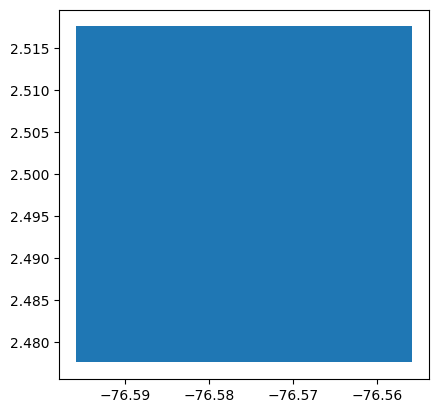

In [9]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt

# Localizar tu hogar y tu barrio en el mapa (usando coordenadas de geojson.io)
x_hogar = -76.576
y_hogar = 2.4976
x_barrio = -76.5758
y_barrio = 2.4976

coordenadas_hogar = (x_hogar, y_hogar)
coordenadas_barrio = (x_barrio, y_barrio)

# Crear un punto para representar tu hogar y tu barrio
punto_hogar = Point(coordenadas_hogar)
punto_barrio = Point(coordenadas_barrio)

# Dibujar un recuadro sobre tu casa o tu barrio (ejemplo de un cuadrado)
recuadro = Polygon([(coordenadas_hogar[0]-0.0000001, coordenadas_hogar[1]-0.0000001),
                    (coordenadas_hogar[0]+0.0000001, coordenadas_hogar[1]-0.0000001),
                    (coordenadas_hogar[0]+0.0000001, coordenadas_hogar[1]+0.0000001),
                    (coordenadas_hogar[0]-0.0000001, coordenadas_hogar[1]+0.0000001)])

# Dibujar linestrings y polígonos para representar características geográficas (ejemplo)
carretera_cercana = LineString([(-76.57898063299918, 2.4931802915546086),
                                (-76.5724072128361, 2.496503447692163)])
barrio_cercano = Polygon([(coordenadas_barrio[0]-0.02, coordenadas_barrio[1]-0.02),
                          (coordenadas_barrio[0]+0.02, coordenadas_barrio[1]-0.02),
                          (coordenadas_barrio[0]+0.02, coordenadas_barrio[1]+0.02),
                          (coordenadas_barrio[0]-0.02, coordenadas_barrio[1]+0.02)])

# Crear un GeoDataFrame

gdf = gpd.GeoDataFrame(geometry=[punto_hogar, punto_barrio, recuadro, carretera_cercana, barrio_cercano])

# Plotear el GeoDataFrame
gdf.plot()
plt.show()

# Guardar el GeoDataFrame en formato GeoJSON
gdf.to_file("mi_mapa2.geojson", driver='GeoJSON')

# Abrir GeoJSON.io y cargar el archivo GeoJSON generado
# Ve a https://geojson.io/
# Haz clic en "Open" y selecciona el archivo "mi_mapa.geojson" que acabas de guardar
# Ahora deberías ver tus geometrías en el mapa

In [11]:
import os
print(os.getcwd())


/content


In [10]:
# Guardar el GeoDataFrame en formato GeoJSON en el escritorio con un nombre sin espacios
#ruta_completa = "C:/Users/Yady Jimenez/OneDrive/Escritorio/yad_geo"
ruta_completa= "mi_mapa.geojson"
gdf.to_file(ruta_completa, driver='GeoJSON')
print(ruta_completa)


mi_mapa.geojson


In [14]:
#verificar si el archivo existe
from os.path import exists
ruta_completa= ("/content/mi_mapa.geojson")
exite=os.path,exists(ruta_completa)
print("existe?: ", exite)

existe?:  (<module 'posixpath' from '/usr/lib/python3.10/posixpath.py'>, True)


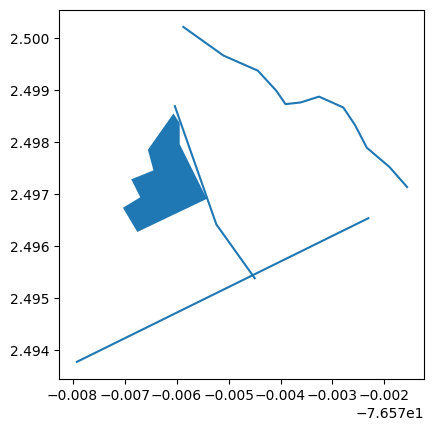

In [16]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt

# Localizar tu hogar y tu barrio en el mapa (usando coordenadas de geojson.io)

# Dibujar un recuadro sobre tu casa o tu barrio (ejemplo de un cuadrado)
recuadro_casa = Polygon([(-76.57610305160782, 2.497133990213797),
                        (-76.57610305160782, 2.497250328430269),
                        (-76.57622381332736, 2.497250328430269),
                        (-76.57622381332736, 2.497133990213797)])
#dibujo punto casa
punto_casa = Point([(-76.57585762151763, 2.497719895819216)])

recuadro_barrio = Polygon ([(-76.57605992242193, 2.498547283405827),
                            (-76.5765515951382, 2.497849254641636),
                            (-76.57644377217382, 2.497452843079401),
                            (-76.5768707511116, 2.497280490187876),
                            (-76.5766982343694, 2.4969357843397546),
                            (-76.57703032909865, 2.496733269610928),
                            (-76.57675430231048, 2.4962679165000594),
                            (-76.57541729755607, 2.4969056225728536),
                            (-76.57593916070239, 2.497956975153116),
                            (-76.57593916070239,2.4983620042022068)])
#dibujo punto barrio
punto_barrio = Point([(-76.57616719933496, 2.497221051038906)])

# Dibujar linestrings y polígonos para representar características geográficas, rios variantes
carretera_cercana = LineString([(-76.57603921245251, 2.4987075484162915),
                                (-76.57523426525724, 2.4964138004378498),
                                (-76.57448420082518, 2.495362878712143)])

variente_cercana = LineString([(-76.57229281574226, 2.4965415579052745),
                                (-76.57793543287683, 2.493760703356486)])

quebrada_cercana = LineString ([(-76.57588605236887, 2.5002243786449156),
                            (-76.57509645420858, 2.4996609167368717),
                            (-76.57443577003463, 2.499371136233151),
                            (-76.5740812565745, 2.4989847621274066),
                            (-76.57390399984507, 2.498727179327929),
                            (-76.57361394337808, 2.4987593771805905),
                            (-76.5732594299186, 2.4988720696582334),
                            (-76.57279211672217, 2.498662783620162),
                            (-76.57256651724774, 2.4983247061019256),
                            (-76.57234091777327, 2.49789003487804),
                            (-76.57190583307312, 2.497519759278603),
                            (-76.57155131961363, 2.4971172856826627)])

# Crear un GeoDataFrame
#aqui se cambia el color
gdf = gpd.GeoDataFrame(geometry=[punto_hogar, punto_barrio, recuadro_barrio, recuadro_casa, carretera_cercana, variente_cercana, quebrada_cercana])
   # Crear un GeoDataFrame con el punto de la casa
   #gdf_casa = gpd.GeoDataFrame(geometry=[punto_casa])

# Plotear el GeoDataFrame con el punto de la casa, asignando un color específico
#gdf_casa.plot(color='red', markersize=50)  # Por ejemplo, aquí he usado color rojo y un tamaño de marcador de 50
#plt.show()

# Plotear el GeoDataFrame
gdf.plot()
plt.show()

# Guardar el GeoDataFrame en formato GeoJSON
gdf.to_file("mi_mapa24.geojson", driver='GeoJSON')

# Abrir GeoJSON.io y cargar el archivo GeoJSON generado
# Ve a https://geojson.io/
# Haz clic en "Open" y selecciona el archivo "mi_mapa.geojson" que acabas de guardar
# Ahora deberías ver tus geometrías en el mapa